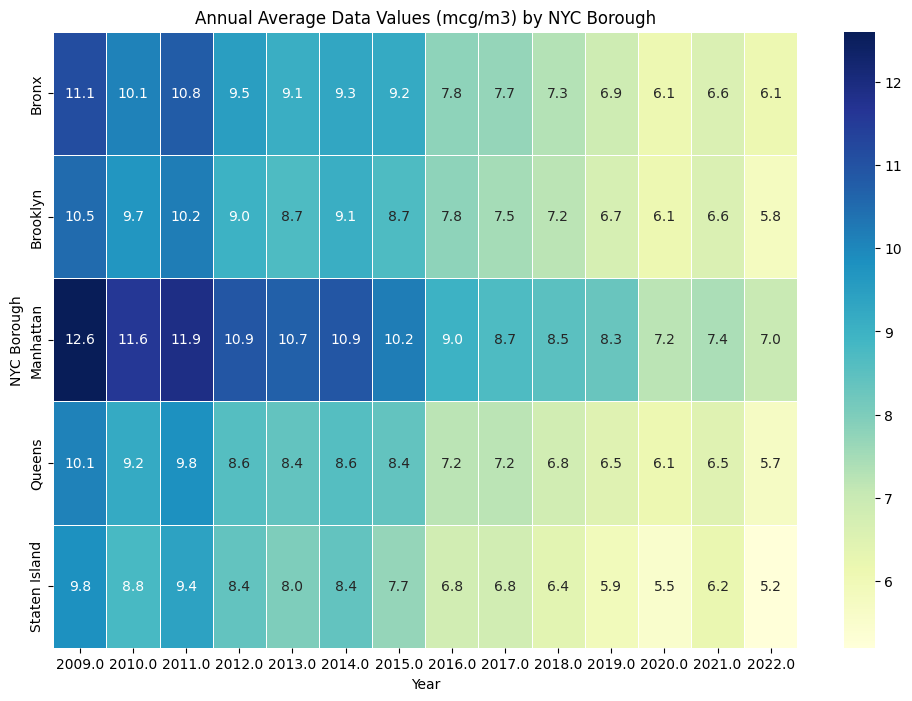

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/Users/kelly/Desktop/github-fun-projects/city-of-new-york-air-quality-measurement/data/clean_data.csv')

# List of NYC boroughs
nyc_boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

# Filter data for 'Annual Average' only
annual_avg_data = data[data['Time Period'].str.contains('Annual Average', na=False)]

# Filter data for only NYC boroughs
annual_avg_data = annual_avg_data[annual_avg_data['Geo Place Name'].isin(nyc_boroughs)]

# Extract year from the 'Time Period' for the heatmap columns
annual_avg_data['Year'] = annual_avg_data['Time Period'].str.extract(r'(\d{4})').astype(float)

# Filter data for mcg/m3 and Âµg/m3 since they are one in the same
air_quality_data = annual_avg_data[(annual_avg_data['Measure Info'] == 'mcg/m3') | (annual_avg_data['Measure Info'] == 'Âµg/m3')]

# Pivot the filtered data
heatmap_data = air_quality_data.pivot_table(
    index='Geo Place Name',
    columns='Year',
    values='Data Value',
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Annual Average Data Values (mcg/m3) by NYC Borough')
plt.xlabel('Year')
plt.ylabel('NYC Borough')
plt.show()